In [1]:
import sys
import sklearn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train_data.csv')
df

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,post_brain_area,pre_nucleus_x,pre_nucleus_y,pre_nucleus_z,post_nucleus_x,post_nucleus_y,post_nucleus_z,pre_nucleus_id,post_nucleus_id,connected
0,42593,1187660,411978,1089020,1187390,412220,1089160,304.185,353043.0,1182170.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
1,42594,1204580,682542,873138,1204640,682870,873890,725.431,244156.0,914243.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
2,42595,1191790,403683,1093180,1188590,402414,1092660,3423.030,363829.0,1171820.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
3,42596,1184320,419286,1082930,1186620,419721,1085540,3442.390,344267.0,1192340.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
4,42597,1189150,673302,944202,1188790,677771,942901,4442.380,313630.0,788566.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185827,228420,1260230,553602,913395,1262580,551457,912880,3162.000,86928.2,936997.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185828,228421,1214580,405321,916671,1212910,402240,915289,3503.660,114862.0,1136290.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185829,228422,1223920,375081,840987,1221050,372827,843288,3939.260,140923.0,1173670.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185830,228423,1253490,387870,853797,1257280,390086,854335,4192.360,110553.0,1126160.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False


In [3]:
df.dtypes

ID                                  int64
axonal_coor_x                       int64
axonal_coor_y                       int64
axonal_coor_z                       int64
dendritic_coor_x                    int64
dendritic_coor_y                    int64
dendritic_coor_z                    int64
adp_dist                          float64
post_skeletal_distance_to_soma    float64
pre_skeletal_distance_to_soma     float64
pre_oracle                        float64
pre_test_score                    float64
pre_rf_x                          float64
pre_rf_y                          float64
post_oracle                       float64
post_test_score                   float64
post_rf_x                         float64
post_rf_y                         float64
compartment                        object
pre_brain_area                     object
post_brain_area                    object
pre_nucleus_x                       int64
pre_nucleus_y                       int64
pre_nucleus_z                     

In [4]:
feature_weights = pd.read_csv('feature_weights.csv')
feature_weights

,nucleus_id,feature_weight_0,feature_weight_1,feature_weight_2,feature_weight_3,feature_weight_4,feature_weight_5,feature_weight_6,feature_weight_7,feature_weight_8,...,feature_weight_502,feature_weight_503,feature_weight_504,feature_weight_505,feature_weight_506,feature_weight_507,feature_weight_508,feature_weight_509,feature_weight_510,feature_weight_511
0,557058,0.205733,0.317099,-0.241713,0.014264,-0.314002,-0.432338,0.152562,0.186511,0.140944,...,-0.034500,0.363631,0.183755,0.231815,0.042877,0.402666,0.016072,0.072968,-0.452475,-0.175632
1,155650,0.166665,-0.293123,-0.017896,-0.159223,0.246045,-0.138767,0.217365,-0.174787,-0.050760,...,0.276523,0.333738,0.277954,-0.124248,0.228173,0.029465,0.198626,-0.044919,0.661572,0.110016
2,425987,0.453440,0.174334,0.279131,0.144052,0.218536,0.110859,-0.090576,0.125406,0.110690,...,0.300525,-0.160008,0.052873,0.112233,-0.091779,-0.046790,0.280856,0.399340,0.305763,0.218547
3,262149,0.537410,0.165957,0.543808,-0.386137,-0.113595,0.046351,0.054061,0.247789,-0.502975,...,-0.113184,0.117278,0.011819,0.491052,-0.161192,0.868506,0.215711,0.108492,-0.607824,0.296478
4,557067,-0.193376,-0.058421,-0.074607,0.009510,-0.038007,0.011739,-0.141879,0.308456,0.392383,...,0.327086,0.413605,-0.092548,-0.091461,-0.025144,-0.202813,0.241059,0.014646,-0.073372,-0.242132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,368622,-0.330541,0.475290,0.010314,0.532330,-0.475708,0.443309,0.129722,-0.246515,0.317328,...,-0.000365,-0.001144,0.316298,0.075985,0.049807,-0.024745,0.322744,-0.502619,0.218220,-0.048334
2688,614382,0.275322,0.435353,0.091335,-0.033993,-0.504363,-0.133884,-0.367399,0.478917,0.033984,...,0.121871,-0.017587,0.141196,0.140291,0.354196,-0.044375,0.495297,0.369650,0.114305,0.281917
2689,557041,-0.598981,0.061932,-0.074026,0.171314,-0.250348,0.438974,-0.235911,0.036702,0.365656,...,0.039513,-0.141897,-0.232804,0.020774,0.542075,0.380731,0.189838,0.150242,-0.222899,-0.032958
2690,196596,0.024009,0.075810,0.314906,-0.302266,0.007095,0.024825,0.432788,-0.238054,0.210615,...,0.218091,0.377625,0.157004,0.265006,0.412147,0.088211,0.780171,0.079002,-0.009118,0.244956


In [5]:
morph_embeddings = pd.read_csv('morph_embeddings.csv')
morph_embeddings

,nucleus_id,morph_emb_0,morph_emb_1,morph_emb_2,morph_emb_3,morph_emb_4,morph_emb_5,morph_emb_6,morph_emb_7,morph_emb_8,...,morph_emb_22,morph_emb_23,morph_emb_24,morph_emb_25,morph_emb_26,morph_emb_27,morph_emb_28,morph_emb_29,morph_emb_30,morph_emb_31
0,557058,0.748665,0.003966,-0.409828,0.549701,0.877232,-0.861881,0.629896,-0.630121,-1.311927,...,0.300712,-1.397289,1.118014,-0.183371,0.246255,0.496138,0.008009,0.349553,-1.490972,0.034168
1,155650,0.608481,-0.415141,0.365810,0.732117,-0.107357,-1.346027,-0.597964,-0.618534,-0.429153,...,-1.016053,-1.069679,0.031847,-0.703084,0.367078,-0.054149,0.341367,0.757009,-1.037782,-1.001121
2,425987,0.275470,0.384237,-0.591495,1.422552,0.587310,-1.279693,0.823187,-0.459843,-0.620660,...,0.094792,-1.221155,1.003695,-0.654525,-0.083740,0.745382,0.226264,0.034323,-1.541942,-0.342919
3,262149,0.642875,0.554093,-0.629258,1.279186,0.834185,-0.887523,1.052660,-0.252436,-0.479046,...,0.121963,-1.371947,0.946631,-0.399507,-0.180614,0.965515,0.514904,0.118434,-1.490275,-0.101109
4,557067,-0.099494,0.317106,-0.487286,0.963860,0.805484,-1.050071,1.271212,-0.220312,-0.938172,...,0.711220,-1.327322,0.914697,-0.734054,0.244786,0.235148,0.241681,0.445482,-1.314073,0.120069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,368622,0.873676,0.423390,-0.761424,0.347703,0.909603,-0.681839,1.954970,0.292521,-0.569789,...,0.631304,-1.632103,0.773492,-0.402078,0.333562,0.596720,0.634237,-0.052678,-1.086833,0.630007
2663,614382,0.285185,0.756431,-0.504513,1.221981,0.680886,-1.068822,0.794427,-0.820927,-0.719917,...,0.149082,-1.459964,0.895938,-0.809432,0.492356,0.290293,-0.056787,0.449943,-1.465123,-0.285587
2664,557041,1.000909,-0.269747,-0.404520,0.338924,0.988922,-0.975366,0.689095,-0.329750,-1.090898,...,0.104898,-1.258816,1.209954,-0.299763,0.031836,0.807699,0.286448,-0.137722,-1.562565,0.324807
2665,196596,1.121776,0.140512,-0.380805,0.313302,0.883713,-1.028015,1.484881,0.099239,-0.676376,...,0.400964,-1.606705,0.851969,-0.796522,0.432455,0.426968,0.166209,-0.090414,-1.111706,0.474158


### Data Merge

In [6]:
# join all feature_weight_i columns into a single np.array column
feature_weights["feature_weights"] = (
    feature_weights.filter(regex="feature_weight_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the feature_weight_i columns
feature_weights.drop(
    feature_weights.filter(regex="feature_weight_").columns, axis=1, inplace=True
)

# join all morph_embed_i columns into a single np.array column
morph_embeddings["morph_embeddings"] = (
    morph_embeddings.filter(regex="morph_emb_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the morph_embed_i columns
morph_embeddings.drop(
    morph_embeddings.filter(regex="morph_emb_").columns, axis=1, inplace=True
)

In [7]:
df = (
    df.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [8]:
print("Data Size:",df.shape)
print("\nData:")
df.info()

Data Size: (185832, 34)

Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185832 entries, 0 to 185831
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              185832 non-null  int64  
 1   axonal_coor_x                   185832 non-null  int64  
 2   axonal_coor_y                   185832 non-null  int64  
 3   axonal_coor_z                   185832 non-null  int64  
 4   dendritic_coor_x                185832 non-null  int64  
 5   dendritic_coor_y                185832 non-null  int64  
 6   dendritic_coor_z                185832 non-null  int64  
 7   adp_dist                        185832 non-null  float64
 8   post_skeletal_distance_to_soma  185832 non-null  float64
 9   pre_skeletal_distance_to_soma   185832 non-null  float64
 10  pre_oracle                      185832 non-null  float64
 11  pre_test_score                  185832 non-null

### EDA

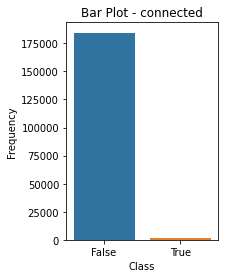

In [9]:
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="connected")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Bar Plot - connected")
plt.show()

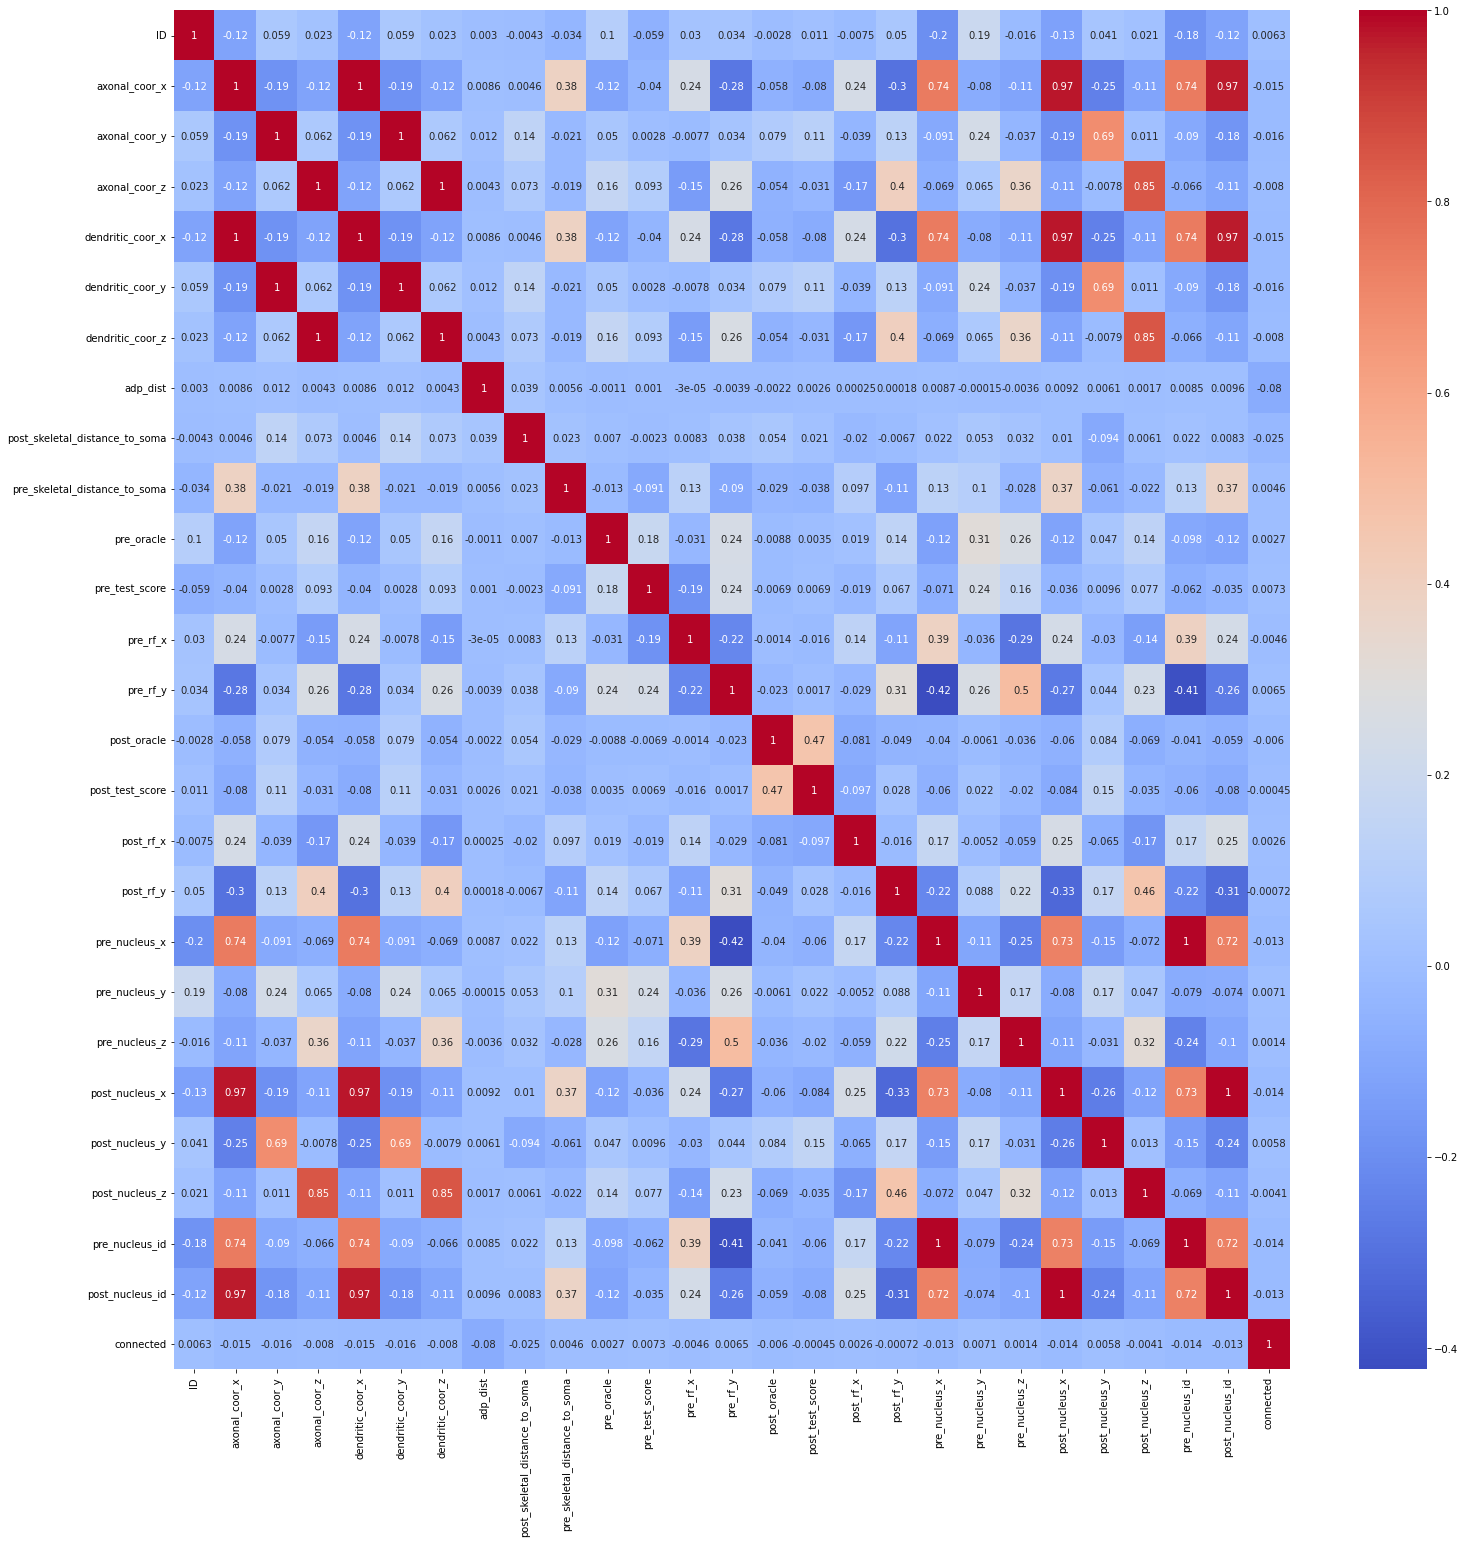

In [10]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
print(df['pre_morph_embeddings'][:20][1])

print(df['post_morph_embeddings'][:10][0])

[ 0.37331563  0.20981796 -0.12377156  0.69827348 -0.36436009 -0.08803897
 -0.95162904 -1.84342027 -0.53751272  0.48871696 -0.04196498  0.5997926
 -0.54694623 -0.75036496  0.55511707  0.52048707 -1.53206408  0.92715424
 -0.50563061  0.44323295  0.27195328  0.36682391  0.50746822  0.6308834
 -1.39840472  0.09875204  0.83224845 -0.98368824  1.08574307 -0.39546612
 -1.15127075 -0.4951764 ]
[ 1.0723995  -0.75409424  0.11248356 -0.33294636  0.74433136  1.22747672
 -0.83208716 -0.03111291 -0.36152899  0.55694693 -0.29966968 -0.0296001
  0.89789367 -2.2048285  -0.38498485 -1.06485069 -0.81627333 -0.21522449
 -0.59838223  0.54533499 -0.52522391  0.1716475   1.02296185 -0.04220269
 -0.64514601 -0.687774   -0.12143467 -0.93764007 -0.85765183 -0.41315266
 -0.3406806   0.79048932]


In [12]:
df['pre_morph_embeddings'].isna().sum()

47709

In [13]:
df['post_morph_embeddings'].isna().sum()

0

In [14]:
type(df['pre_morph_embeddings'][:20][1])

numpy.ndarray

In [15]:
# Check which arrays in the Series have NaN values
pre_morph_series = df['pre_morph_embeddings']
arrays_with_nan = pre_morph_series[pre_morph_series.apply(lambda arr: np.isnan(arr).any())]

# Now 'arrays_with_nan' is a boolean Series indicating which arrays have NaN values
print(arrays_with_nan)

20458     NaN
20459     NaN
20460     NaN
20461     NaN
20462     NaN
         ... 
179187    NaN
179188    NaN
179189    NaN
179190    NaN
179191    NaN
Name: pre_morph_embeddings, Length: 47709, dtype: object


In [16]:
print(df['compartment'])
print(df['compartment'].unique())
print(df['compartment'].nunique())

0                axon
1                axon
2                axon
3                axon
4                axon
             ...     
185827           axon
185828    apical_tuft
185829    apical_tuft
185830    apical_tuft
185831           axon
Name: compartment, Length: 185832, dtype: object
['axon' 'oblique' 'apical' 'basal' 'soma' 'apical_tuft' 'apical_shaft']
7


In [17]:
df.describe()

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,post_rf_x,post_rf_y,pre_nucleus_x,pre_nucleus_y,pre_nucleus_z,post_nucleus_x,post_nucleus_y,post_nucleus_z,pre_nucleus_id,post_nucleus_id
count,185832.000000,1.858320e+05,1.858320e+05,1.858320e+05,1.858320e+05,1.858320e+05,1.858320e+05,185832.000000,1.858320e+05,1.858320e+05,...,185832.000000,185832.000000,1.858320e+05,185832.000000,1.858320e+05,1.858320e+05,185832.000000,1.858320e+05,185832.000000,185832.000000
mean,135508.500000,1.064839e+06,6.355946e+05,8.686252e+05,1.064839e+06,6.355682e+05,8.686154e+05,2504.942886,1.197602e+05,8.059328e+05,...,882.106377,551.630843,1.056598e+06,565311.158294,8.594359e+05,1.064603e+06,616317.829954,8.650727e+05,444051.831089,449398.818271
std,53645.221949,2.755125e+05,1.282959e+05,1.013454e+05,2.755147e+05,1.282878e+05,1.013388e+05,1451.981377,1.162254e+05,4.040988e+05,...,55.471924,50.626562,2.874460e+05,105434.704702,8.789992e+04,2.787515e+05,110972.976152,9.769970e+04,142163.217350,137218.456147
min,42593.000000,3.728340e+05,2.899680e+05,5.940060e+05,3.740490e+05,2.922430e+05,5.938130e+05,0.023439,0.000000e+00,0.000000e+00,...,720.054623,375.266522,5.763200e+05,402624.000000,6.250000e+05,4.519680e+05,373376.000000,6.446800e+05,189149.000000,109379.000000
25%,89050.750000,7.692720e+05,5.387760e+05,7.919310e+05,7.694320e+05,5.389198e+05,7.918698e+05,1198.125000,5.449802e+04,5.303278e+05,...,837.068399,526.724932,7.406080e+05,475904.000000,7.915200e+05,7.603840e+05,523328.000000,7.863600e+05,294776.000000,301216.000000
50%,135508.500000,1.187090e+06,6.591165e+05,8.695260e+05,1.187100e+06,6.589870e+05,8.696060e+05,2478.690000,9.051745e+04,7.332060e+05,...,875.133201,555.494070,1.194624e+06,535040.000000,8.445200e+05,1.188224e+06,626112.000000,8.690400e+05,518224.000000,518801.000000
75%,181966.250000,1.304965e+06,7.277760e+05,9.445800e+05,1.304840e+06,7.278462e+05,9.445852e+05,3788.427500,1.384212e+05,1.019975e+06,...,918.585627,586.433995,1.311616e+06,665856.000000,9.198800e+05,1.311744e+06,698368.000000,9.380400e+05,580826.000000,580918.000000
max,228424.000000,1.594510e+06,1.095880e+06,1.114280e+06,1.595170e+06,1.095490e+06,1.114580e+06,4999.990000,1.901600e+06,2.433020e+06,...,1089.618514,724.663203,1.409408e+06,904768.000000,1.078000e+06,1.457408e+06,918464.000000,1.064200e+06,612352.000000,669554.000000


### Pre-processing

In [18]:
#cosine similarity function
def row_feature_similarity(row):
    pre = row["pre_feature_weights"]
    post = row["post_feature_weights"]
    return (pre * post).sum() / (np.linalg.norm(pre) * np.linalg.norm(post))

In [19]:
# get the difference between pre and post nucleus distance
def get_dist(row):
    return np.linalg.norm(np.array([row['pre_nucleus_x'], row['pre_nucleus_y'], row['pre_nucleus_z']]) - 
                         np.array([row['post_nucleus_x'], row['post_nucleus_y'], row['post_nucleus_z']]))

In [20]:
def feat_engineering(data):
    # Combine our pre and post areas into one projection group feature
    data["projection_group"] = (
        data["pre_brain_area"].astype(str)
        + "->"
        + data["post_brain_area"].astype(str)
    )
    data = data.drop(columns = ['pre_brain_area', 'post_brain_area'])
    
    
    # label encode our projection groups
    data["projection_group"] = pd.factorize(data["projection_group"])[0]
    
    # Get the distance between pre and post nucleus
    data["nucleus_dist"] = data.apply(get_dist, axis=1)
    data = data.drop(columns = ['pre_nucleus_x', 'pre_nucleus_y', 'pre_nucleus_z',
                               'post_nucleus_x', 'post_nucleus_y', 'post_nucleus_z'])
    
    
    # combine axonal and dendritic coords due to their 1:1 correlation
    data['axonal_dendritic_x'] = (data['axonal_coor_x'] + data['dendritic_coor_x'])/2
    data['axonal_dendritic_y'] = (data['axonal_coor_y'] + data['dendritic_coor_z'])/2
    data['axonal_dendritic_z'] = (data['axonal_coor_y'] + data['dendritic_coor_z'])/2
    data = data.drop(columns = ['axonal_coor_x', 'axonal_coor_y', 'axonal_coor_z',
                           'dendritic_coor_x', 'dendritic_coor_y', 'dendritic_coor_z'])
    
    
    # combine feature similarities
    data["fw_similarity"] = data.apply(row_feature_similarity, axis=1)
    data = data.drop(columns=['pre_feature_weights', 'post_feature_weights'])
    
    # one hot encode the 7 unique compartment types
    data = pd.get_dummies(data, columns=['compartment'], prefix=['compartment'])
    
    # Since this feature has missing values, some rows do not have an array of embeddings at all
    data['pre_morph_embeddings'].fillna(method='ffill', inplace=True)
    
    # Split the embedding feature arrays into individual features
    pre_embedding_columns = [f"pre_embedding_{i}" for i in range(32)]
    data[pre_embedding_columns] = data['pre_morph_embeddings'].apply(pd.Series)
    
    post_embedding_columns = [f"post_embedding_{i}" for i in range(32)]
    data[post_embedding_columns] = data['post_morph_embeddings'].apply(pd.Series)
    data = data.drop(columns = ['pre_morph_embeddings', 'post_morph_embeddings'])
    
    # fill in any remaining NaNs, temp solution for now
    data.fillna(np.mean(data), inplace=True)
    

    
    return data

In [21]:
def dim_reduction(data):
    # Run PCA to reduce the number of embedding features
    # Specify the number of components you want to retain
    embeddings_pca = pca.transform(data.iloc[:, -64:])
    
    pca_feature_names = [f'pca_{i}' for i in range(1, 1 + num_components)]
    
    data.drop(data.columns[-64:], axis=1, inplace=True)
    data[pca_feature_names] = embeddings_pca
    
    return data

In [22]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()  

# split into X and y dataframes
y = df['connected']
X = df.drop(columns = ['ID', 'connected'])

# training and validation split
X_train, X_valid, y_train, y_valid = train_test_split(
     X, y, test_size=0.15, random_state = 42, stratify = y)

# feature engineering
X_train = feat_engineering(X_train)
X_valid = feat_engineering(X_valid)

# scaling, fit only on training data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

# PCA
num_components = 8
pca = PCA(n_components=num_components)
pca.fit(X_train.iloc[:, -64:])

#X_train = dim_reduction(X_train)
#X_valid = dim_reduction(X_valid)

# Oversampling
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
X_train.dtypes

adp_dist                          float64
post_skeletal_distance_to_soma    float64
pre_skeletal_distance_to_soma     float64
pre_oracle                        float64
pre_test_score                    float64
                                   ...   
post_embedding_27                 float64
post_embedding_28                 float64
post_embedding_29                 float64
post_embedding_30                 float64
post_embedding_31                 float64
Length: 90, dtype: object

In [24]:
X_train.nunique()

adp_dist                          139645
post_skeletal_distance_to_soma    137752
pre_skeletal_distance_to_soma      92528
pre_oracle                            77
pre_test_score                        77
                                   ...  
post_embedding_27                   2662
post_embedding_28                   2662
post_embedding_29                   2662
post_embedding_30                   2662
post_embedding_31                   2661
Length: 90, dtype: int64

In [25]:
X_train.head(10)

,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,pre_oracle,pre_test_score,pre_rf_x,pre_rf_y,post_oracle,post_test_score,post_rf_x,...,post_embedding_22,post_embedding_23,post_embedding_24,post_embedding_25,post_embedding_26,post_embedding_27,post_embedding_28,post_embedding_29,post_embedding_30,post_embedding_31
0,0.411352,1.395841,0.655071,1.099375,-0.685242,0.308950,-1.761983,1.542537,0.298383,-0.703924,...,1.691775,-0.470737,0.137531,-0.924205,-0.323885,-0.266040,-1.108973,-1.059482,0.048413,1.734666
1,-0.294176,1.494435,1.714114,0.037250,0.440594,-1.866187,1.022267,1.408156,1.556933,0.230487,...,0.363783,-0.262261,1.056502,-1.495252,-1.530794,-0.649800,-1.707299,-0.909687,1.426407,1.800089
2,-0.762258,-0.722521,0.590853,1.099375,-0.685242,0.308950,-1.761983,-1.119241,0.334556,2.140729,...,-1.734980,-0.748454,-0.665314,0.896996,0.656465,-0.166472,0.552543,0.791285,0.119912,-1.536893
3,1.621518,0.624916,1.011421,0.768008,1.027648,0.363463,1.557170,0.466742,0.589445,-0.467692,...,0.223655,0.028513,-0.265301,0.941997,1.197687,0.963968,0.790959,0.972501,-0.575168,-0.677012
4,-1.099132,-0.103204,-1.603943,0.930125,1.145067,0.614370,0.016020,0.045130,0.283916,-0.010715,...,-0.548021,-0.488617,-0.348637,-1.084456,-1.345784,-1.330905,-1.208421,-1.206757,0.430704,0.881046
5,-0.106950,2.991831,0.029618,0.036163,0.787542,0.314505,-0.679231,0.733951,-0.372891,0.037903,...,1.075562,0.007430,-0.719156,-0.341351,0.521668,-0.466120,-0.517162,-0.394494,-0.191538,0.925176
6,-1.191059,-0.894172,0.383527,0.220102,0.550209,-0.964414,0.633316,1.469257,-0.740003,0.114350,...,-0.622980,0.128597,0.011987,1.152961,0.532872,1.109470,1.153035,0.629416,-1.402548,-1.342004
7,-0.678146,-0.125422,-0.528014,0.143644,-1.061115,-0.209934,-1.363943,0.386056,-0.849196,-0.951993,...,1.101011,-1.656306,2.974911,0.542701,-0.775353,0.270977,1.326805,1.800282,1.020797,-0.584665
8,0.494817,-0.083693,-0.527068,0.810858,1.839190,-0.517679,0.862866,-0.425716,-0.893890,0.648030,...,-0.899751,1.242975,0.143035,0.225204,0.540392,-1.661587,0.480157,1.261124,1.229586,-0.836060
9,0.795122,0.164039,-0.545350,0.022706,2.118335,-0.282354,-0.346880,-1.565556,-0.869749,0.552698,...,-0.019542,0.357518,0.005032,-0.925214,-1.249345,-0.883994,0.557262,-0.440925,0.983451,-0.743241


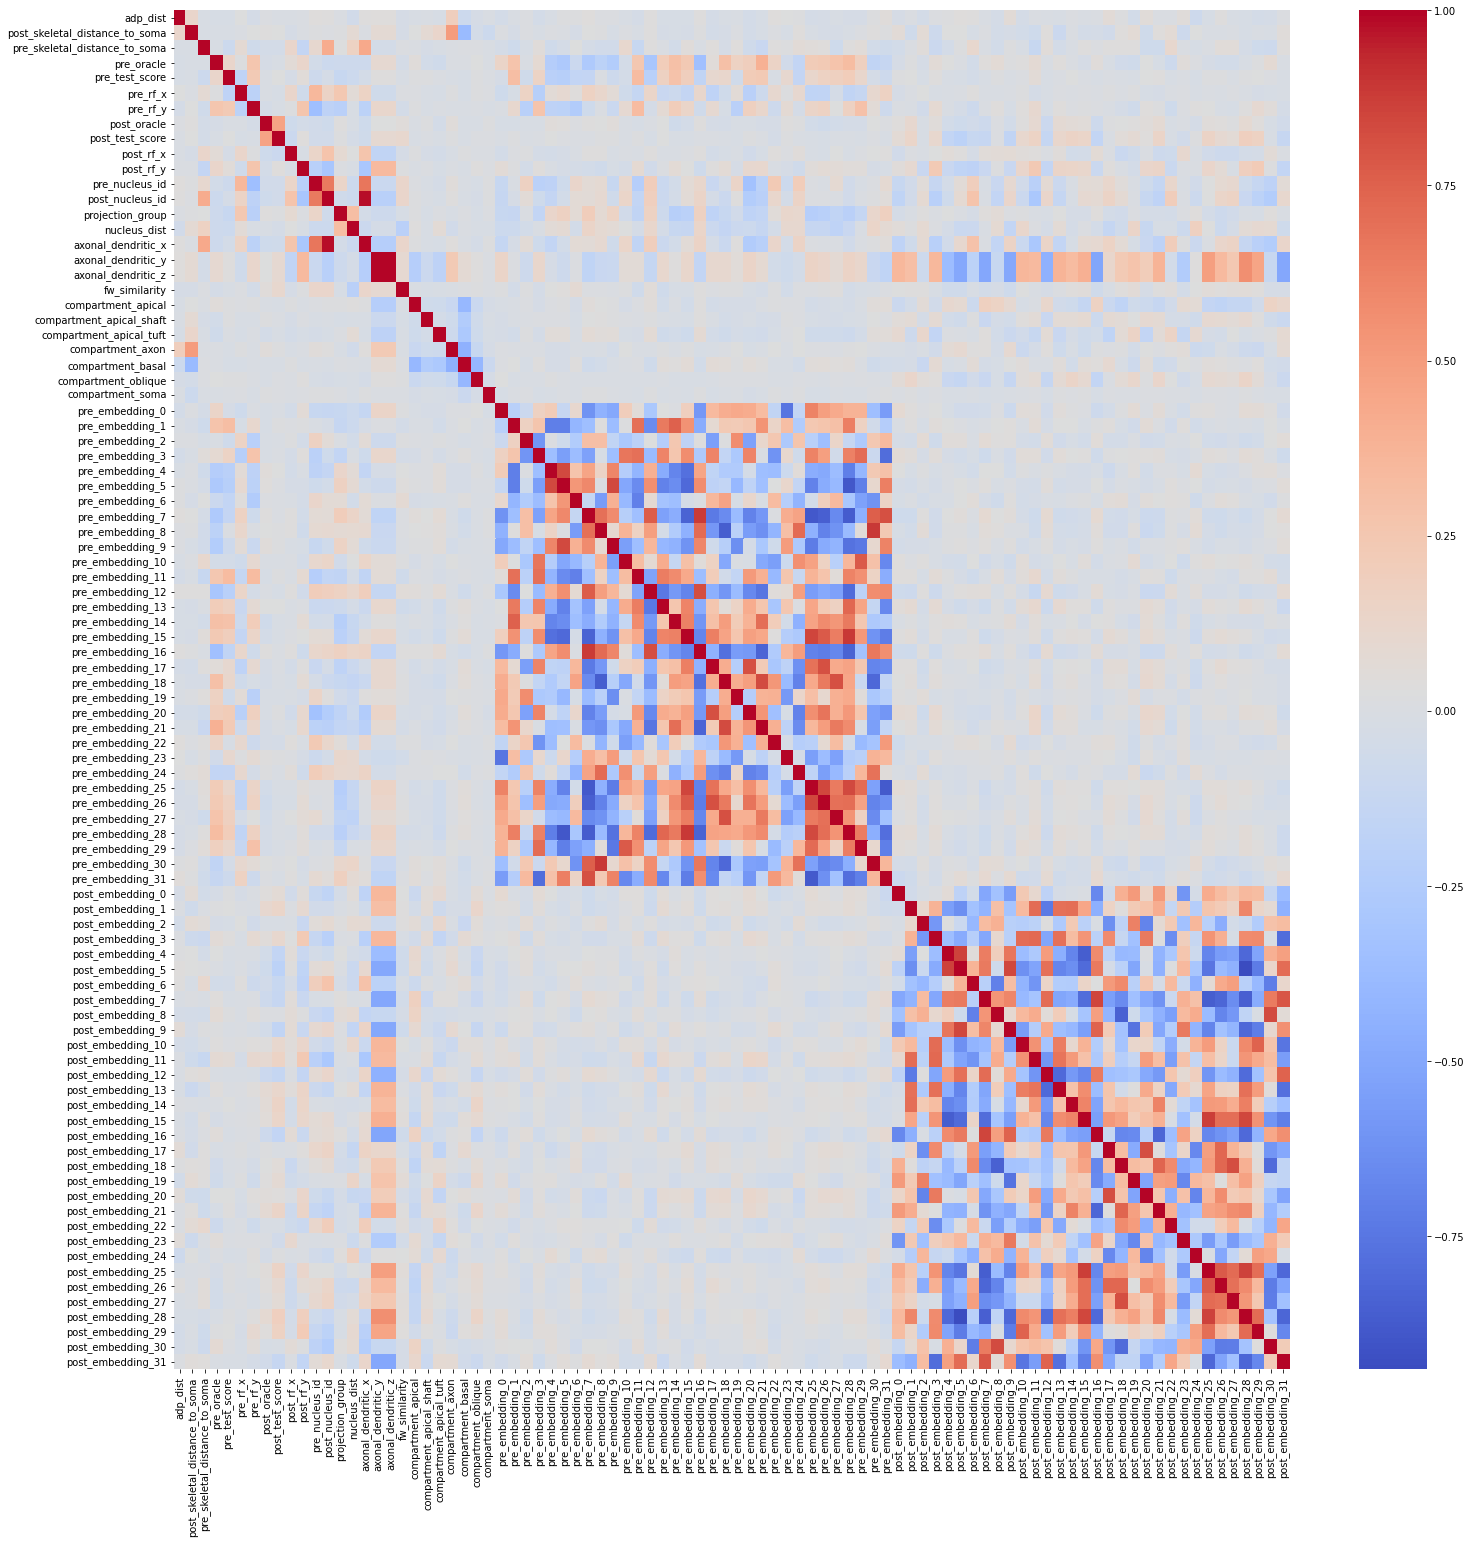

In [26]:
plt.figure(figsize = (25,25))
sns.heatmap(X_train.corr(), annot=False, cmap="coolwarm")
plt.show()

### Model Fitting

#### LogisticRegression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import time

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

modelLR = LogisticRegression(random_state = 42, max_iter = 300, n_jobs = -1, tol=1e-10)

paramsLR = {
    'C': [1e-10, 1e-4, 1e-2, 1, 3, 5, 10, 20, 50],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [uniform(0, 1)],
    'class_weight':[None, 
                    {'False': 1,'True':(len(df[df['connected'] == False]) / len(df[df['connected' ] == True]))},
                    {'False': 1,'True':100},
                    'balanced']
    }


    
random_searchLR = RandomizedSearchCV(modelLR, param_distributions=paramsLR,
                                   n_iter=50, scoring='f1', 
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=42 )

start = time.time()
random_searchLR.fit(X_train, y_train)
end = time.time()
print(end - start)

yhat = random_searchLR.predict(X_valid)
print(classification_report(y_valid, yhat))



Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.70685219        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.80721829        nan        nan        nan        nan        nan
 0.80546032        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.80838135        nan        nan
        nan        nan]
  category=UserWarning
c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(sel

250.6731321811676
              precision    recall  f1-score   support

       False       1.00      0.71      0.83     27670
        True       0.02      0.80      0.04       205

    accuracy                           0.71     27875
   macro avg       0.51      0.75      0.44     27875
weighted avg       0.99      0.71      0.83     27875



In [28]:
print('\n All results:')
print(random_searchLR.cv_results_)
print('\n Best estimator:')
print(random_searchLR.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (5, 20))
print(random_searchLR.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_searchLR.best_params_)
results = pd.DataFrame(random_searchLR.cv_results_)
results


 All results:
{'mean_fit_time': array([ 0.66001341,  2.46632752,  1.52271724,  0.65701547,  0.28677526,
        0.64208629,  0.50200193,  0.63919194,  0.64368734,  0.67854121,
        0.73374374,  1.42161605,  0.71832979,  0.71544607,  0.74602065,
        0.7430474 ,  0.75465119,  1.51637728, 65.42288148,  0.79081399,
        0.86209333,  0.86002216,  1.77298968,  0.85518787, 10.9041121 ]), 'std_fit_time': array([0.04965102, 0.10346435, 0.13404608, 0.08024946, 0.12732845,
       0.11896027, 0.03523925, 0.09384209, 0.04055144, 0.02687621,
       0.07079473, 0.07480185, 0.04252359, 0.03433976, 0.03208888,
       0.03008594, 0.02147599, 0.07540072, 0.58017956, 0.0398194 ,
       0.07068054, 0.0309324 , 0.13782094, 0.045066  , 0.59902336]), 'mean_score_time': array([0.        , 0.02789106, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_l1_ratio,param_class_weight,param_C,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.660013,0.049651,0.000000,0.000000,elasticnet,<scipy.stats._distn_infrastructure.rv_frozen o...,"{'False': 1, 'True': 135.04099560761347}",10,"{'penalty': 'elasticnet', 'l1_ratio': <scipy.s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
1,2.466328,0.103464,0.027891,0.004802,l2,<scipy.stats._distn_infrastructure.rv_frozen o...,balanced,1e-10,"{'penalty': 'l2', 'l1_ratio': <scipy.stats._di...",0.705588,...,0.705430,0.711505,0.707401,0.708326,0.708466,0.701359,0.706089,0.706852,0.002595,3
2,1.522717,0.134046,0.000000,0.000000,l2,<scipy.stats._distn_infrastructure.rv_frozen o...,"{'False': 1, 'True': 135.04099560761347}",1e-10,"{'penalty': 'l2', 'l1_ratio': <scipy.stats._di...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
3,0.657015,0.080249,0.000000,0.000000,elasticnet,<scipy.stats._distn_infrastructure.rv_frozen o...,balanced,10,"{'penalty': 'elasticnet', 'l1_ratio': <scipy.s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
4,0.286775,0.127328,0.000000,0.000000,elasticnet,<scipy.stats._distn_infrastructure.rv_frozen o...,None,5,"{'penalty': 'elasticnet', 'l1_ratio': <scipy.s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
5,0.642086,0.118960,0.000000,0.000000,l2,<scipy.stats._distn_infrastructure.rv_frozen o...,"{'False': 1, 'True': 100}",5,"{'penalty': 'l2', 'l1_ratio': <scipy.stats._di...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
6,0.502002,0.035239,0.000000,0.000000,l1,<scipy.stats._distn_infrastructure.rv_frozen o...,"{'False': 1, 'True': 100}",0.01,"{'penalty': 'l1', 'l1_ratio': <scipy.stats._di...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
7,0.639192,0.093842,0.000000,0.000000,l1,<scipy.stats._distn_infrastructure.rv_frozen o...,balanced,1,"{'penalty': 'l1', 'l1_ratio': <scipy.stats._di...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
8,0.643687,0.040551,0.000000,0.000000,elasticnet,<scipy.stats._distn_infrastructure.rv_frozen o...,balanced,20,"{'penalty': 'elasticnet', 'l1_ratio': <scipy.s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,0.678541,0.026876,0.000000,0.000000,elasticnet,<scipy.stats._distn_infrastructure.rv_frozen o...,balanced,1e-10,"{'penalty': 'elasticnet', 'l1_ratio': <scipy.s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


#### NaiveBayes

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

modelNB = GaussianNB()
modelNB.fit(X_train, np.ravel(y_train)) 
yhat = modelNB.predict(X_valid)

loss = log_loss(yhat, y_valid)
print(loss)

print(classification_report(y_valid, yhat))




25.378411469767002
              precision    recall  f1-score   support

       False       1.00      0.26      0.41     27670
        True       0.01      0.99      0.02       205

    accuracy                           0.27     27875
   macro avg       0.50      0.63      0.22     27875
weighted avg       0.99      0.27      0.41     27875



#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

paramsRF = {
    'bootstrap': [True, False],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [2, 4, 6, 8, 10, 20, None],
    'max_features': [2, 3, 4, 5, 'sqrt'],
    'class_weight':[None, 'balanced', 'balanced_subsample']
    }



modelRF = RandomForestClassifier(n_estimators = 300, n_jobs = -1, 
                                 random_state = 42)
    
random_searchRF = RandomizedSearchCV(modelRF, param_distributions=paramsRF,
                                   n_iter=25, scoring='f1',
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=42 )

start = time.time()
random_searchRF.fit(X_train, y_train)
end = time.time()
print(end - start)

yhat = random_searchRF.predict(X_valid)
print(classification_report(y_valid, yhat))



Fitting 10 folds for each of 25 candidates, totalling 250 fits
6553.929023504257
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     27670
        True       0.10      0.02      0.04       205

    accuracy                           0.99     27875
   macro avg       0.55      0.51      0.52     27875
weighted avg       0.99      0.99      0.99     27875



In [33]:
print('\n All results:')
print(random_searchRF.cv_results_)
print('\n Best estimator:')
print(random_searchRF.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (5, 20))
print(random_searchRF.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_searchRF.best_params_)
results = pd.DataFrame(random_searchRF.cv_results_)
results


 All results:
{'mean_fit_time': array([655.45766077, 264.11182022, 473.28979411, 593.09265482,
       499.45048482, 361.42564559, 415.57160883, 441.99177079,
       416.39754143, 357.05039306, 230.83331583, 261.0685025 ,
       143.23418937, 792.60383682, 606.3003165 , 214.38907685,
       116.25007122, 180.95981302, 304.58025417, 209.96434236,
       255.03104522, 654.59334793, 551.43650877, 264.90857401,
       259.5681572 ]), 'std_fit_time': array([  4.81770211,  22.18489503,  36.475169  ,   7.54551595,
        18.33485502, 113.46220829,   3.90947752,   9.56685273,
        18.27026526,   5.2219499 ,  49.56237693,   5.76456273,
        16.47220668,   4.67562164,  70.43538516,   6.37033466,
        13.3095944 ,   7.99698123,  14.83763252,   4.93551854,
         5.87446355,   7.82724338,  63.05448988,   7.72573427,
        47.34785166]), 'mean_score_time': array([17.28117902, 29.25021694, 27.41484208, 24.30100784, 18.1041419 ,
        8.01043541,  6.47842169,  8.1704206 , 11.4491415 ,

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_class_weight,param_bootstrap,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,655.457661,4.817702,17.281179,1.836548,5,4,5,None,None,False,...,0.998631,0.998726,0.998567,0.998758,0.998472,0.998313,0.998504,0.998561,0.000152,2
1,264.111820,22.184895,29.250217,3.306743,5,1,4,6,None,False,...,0.838848,0.838253,0.834838,0.841311,0.835164,0.832606,0.835294,0.835824,0.002650,19
2,473.289794,36.475169,27.414842,3.934754,10,4,5,8,balanced_subsample,False,...,0.905109,0.901466,0.901467,0.903751,0.903367,0.901730,0.906107,0.903050,0.001585,16
3,593.092655,7.545516,24.301008,3.716857,2,2,5,10,balanced_subsample,False,...,0.941006,0.941995,0.946080,0.944949,0.941624,0.944628,0.941109,0.942706,0.001886,11
4,499.450485,18.334855,18.104142,10.466535,2,2,4,10,balanced,False,...,0.948244,0.944931,0.945648,0.946748,0.944116,0.946269,0.944729,0.945657,0.001153,10
5,361.425646,113.462208,8.010435,7.099715,2,1,4,8,balanced_subsample,False,...,0.906253,0.903817,0.905173,0.907464,0.901893,0.899665,0.904451,0.903051,0.002606,15
6,415.571609,3.909478,6.478422,2.501956,10,1,3,None,balanced,True,...,0.999140,0.999203,0.999108,0.999172,0.999140,0.998853,0.999140,0.999095,0.000116,1
7,441.991771,9.566853,8.170421,7.044344,2,2,3,20,balanced_subsample,False,...,0.996378,0.996030,0.996473,0.996758,0.995872,0.995903,0.995682,0.996058,0.000338,3
8,416.397541,18.270265,11.449142,6.773607,5,2,2,20,balanced_subsample,True,...,0.995713,0.995429,0.995903,0.995777,0.995082,0.995208,0.995208,0.995379,0.000349,6
9,357.050393,5.221950,8.716971,3.253380,10,2,5,10,None,True,...,0.942174,0.941655,0.942994,0.942404,0.939851,0.939763,0.942740,0.941602,0.001226,14


#### XGBoost

In [34]:
from xgboost import XGBClassifier

paramsXGB = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 2, 5],
        'lambda': [0.5, 1, 2, 5, 10, 100],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 4, 6, 8],
        'eta': [0.01, 0.02, 0.05, 0.1, 0.3],
        'scale_pos_weight': [1, 10, 100, (len(df[df['connected'] == False]) / len(df[df['connected' ] == True]))]
        }
    
modelXGB = XGBClassifier(n_estimators= 300, objective='binary:logistic', verbosity=0)
    
random_searchXGB = RandomizedSearchCV(modelXGB, param_distributions=paramsXGB,
                                   n_iter=25, scoring='f1',
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=42 )

start = time.time()
random_searchXGB.fit(X_train, y_train)
end = time.time()
print(end - start)

yhat = random_searchXGB.predict(X_valid)
print(classification_report(y_valid, yhat))

Fitting 10 folds for each of 25 candidates, totalling 250 fits


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


7616.149268388748
              precision    recall  f1-score   support

       False       0.99      0.98      0.99     27670
        True       0.05      0.12      0.07       205

    accuracy                           0.98     27875
   macro avg       0.52      0.55      0.53     27875
weighted avg       0.99      0.98      0.98     27875



In [35]:
print('\n All results:')
print(random_searchXGB.cv_results_)
print('\n Best estimator:')
print(random_searchXGB.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (5, 20))
print(random_searchXGB.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_searchXGB.best_params_)
results = pd.DataFrame(random_searchXGB.cv_results_)
results


 All results:
{'mean_fit_time': array([ 457.96341519,  503.95935304,  917.30490761,  521.07943196,
        290.04137375,  560.02619555,  121.06418605,  332.83694143,
        589.65126944,  600.256234  ,  375.84975631,  356.6321573 ,
        323.81051519,  498.19613125,  278.61031461,  474.4659013 ,
       1058.62746105,  581.50857732,  168.8680234 ,  172.09808078,
        400.23313444,  397.29321201,  346.19095941,  970.12066824,
        489.77160356]), 'std_fit_time': array([  3.88491796,  42.57198622,   4.61763527,  18.06298299,
        11.83466575,  30.18909068,   6.67376501,   8.62434075,
         2.74153669,  34.76981908,   4.49382082,  10.22475578,
        11.04999603,   8.60310937,  21.73190695,  15.13550604,
       206.60043824,  15.0136105 ,   1.34758402,   9.46232436,
         4.20095733,  24.09632385,   5.35710094,  28.79891509,
        75.28433967]), 'mean_score_time': array([0.11216838, 0.13937218, 0.14857862, 0.10603888, 0.10297384,
       0.10655563, 0.09311194, 0.08495

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_min_child_weight,param_max_depth,param_lambda,param_gamma,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,457.963415,3.884918,0.112168,0.030483,0.6,10,10,6,1,2,...,0.991244,0.990774,0.990586,0.991025,0.990274,0.990399,0.990556,0.990840,0.000513,1
1,503.959353,42.571986,0.139372,0.037498,1,100,10,8,100,0.5,...,0.792609,0.793010,0.793954,0.793663,0.793703,0.794226,0.791020,0.793270,0.000886,23
2,917.304908,4.617635,0.148579,0.023044,0.8,135.041,10,8,0.5,0.5,...,0.852421,0.852235,0.852305,0.853032,0.852568,0.852614,0.850003,0.851850,0.000979,11
3,521.079432,18.062983,0.106039,0.027788,1,100,5,6,10,5,...,0.876289,0.875922,0.874212,0.877473,0.876320,0.876173,0.874512,0.875507,0.001133,10
4,290.041374,11.834666,0.102974,0.037226,0.8,10,5,4,0.5,1,...,0.883772,0.881710,0.882255,0.884601,0.883604,0.885076,0.882634,0.883033,0.001131,9
5,560.026196,30.189091,0.106556,0.015534,0.8,1,1,6,1,5,...,0.906260,0.902842,0.904862,0.906497,0.906789,0.905388,0.905688,0.904681,0.001753,6
6,121.064186,6.673765,0.093112,0.028050,1,1,1,2,5,5,...,0.903818,0.904693,0.901281,0.906132,0.909059,0.902475,0.905258,0.904143,0.002614,7
7,332.836941,8.624341,0.084952,0.016008,0.6,100,1,4,0.5,5,...,0.784323,0.784028,0.783715,0.782884,0.784785,0.784647,0.782025,0.783746,0.000833,24
8,589.651269,2.741537,0.128763,0.031641,1,1,1,6,2,1,...,0.901961,0.898276,0.901074,0.900848,0.900112,0.900866,0.898990,0.899665,0.001392,8
9,600.256234,34.769819,0.120508,0.038340,0.8,100,10,6,5,2,...,0.927971,0.923652,0.928054,0.925920,0.926276,0.926960,0.926988,0.926413,0.001248,5


#### ModelStacking

In [36]:
from sklearn.ensemble import StackingClassifier

stacked_model = StackingClassifier(
    estimators=[
        ('lr', modelLR),
        ('nb', modelNB),
        ('rfc', modelRF),
        ('xgb', modelXGB)
    ],
    final_estimator=LogisticRegression()
)

start = time.time()
stacked_model.fit(X_train, y_train)
end = time.time()
print(end - start)

yhat = stacked_model.predict(X_valid)
print(classification_report(y_valid, yhat))

c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\jason nguye

1350.499610900879
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     27670
        True       0.17      0.01      0.02       205

    accuracy                           0.99     27875
   macro avg       0.58      0.50      0.51     27875
weighted avg       0.99      0.99      0.99     27875



#### ModelBlending

In [37]:
train_preds = np.column_stack([
    model.predict(X_train) for model in [random_searchLR, modelNB, random_searchRF, random_searchXGB]
])
test_preds = np.column_stack([
    model.predict(X_valid) for model in [random_searchLR, modelNB, random_searchRF, random_searchXGB]
])

meta_classifier = LogisticRegression()
meta_classifier.fit(train_preds, y_train)

yhat = meta_classifier.predict(test_preds)
print(classification_report(y_valid, yhat))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00     27670
        True       0.10      0.02      0.04       205

    accuracy                           0.99     27875
   macro avg       0.55      0.51      0.52     27875
weighted avg       0.99      0.99      0.99     27875



### Submission

In [47]:
leader = pd.read_csv('leaderboard_data.csv')
leader

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,pre_brain_area,post_brain_area,pre_nucleus_x,pre_nucleus_y,pre_nucleus_z,post_nucleus_x,post_nucleus_y,post_nucleus_z,pre_nucleus_id,post_nucleus_id
0,0,527499,544761,912282,529457,543459,916958,4783.37,239163.00,178032.0,...,AL,V1,1368640,451392,861240,566528,777344,920800,582471,199477
1,1,1269890,471870,837816,1271230,469651,841045,4060.72,294573.00,1193910.0,...,AL,RL,1368640,451392,861240,1196352,492736,919560,582471,518848
2,2,666057,469875,925239,665387,467214,923430,2912.80,4102.75,387714.0,...,AL,V1,1368640,451392,861240,669760,470336,913720,582471,256716
3,3,696633,453516,925806,696648,453417,921875,3272.83,31123.00,424714.0,...,AL,V1,1368640,451392,861240,669760,470336,913720,582471,256716
4,4,567525,585921,888426,570714,583676,891264,4441.75,114201.00,250411.0,...,AL,V1,1368640,451392,861240,672384,609728,932720,582471,260802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42588,42588,765513,818622,870114,766346,817181,871011,1597.63,74187.70,426027.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42589,42589,784476,609000,828177,782564,606911,828562,2607.11,172794.00,553175.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42590,42590,766038,773808,861693,763428,773490,862976,2648.36,44174.50,372663.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42591,42591,738276,614460,855099,741617,612387,854028,3843.24,178179.00,517147.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443


In [48]:
leader = (
    leader.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [49]:
ids = leader['ID']
X_test = leader.drop(columns=['ID'])
X_test = feat_engineering(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
#X_test = dim_reduction(X_test)

submit_preds = random_searchLR.predict(X_test)

In [50]:
X_test

,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,pre_oracle,pre_test_score,pre_rf_x,pre_rf_y,post_oracle,post_test_score,post_rf_x,...,post_embedding_22,post_embedding_23,post_embedding_24,post_embedding_25,post_embedding_26,post_embedding_27,post_embedding_28,post_embedding_29,post_embedding_30,post_embedding_31
0,1.568005,1.017644,-1.551194,0.412871,-0.841887,2.344184,-2.143739,0.900142,0.473624,-0.962574,...,-0.876439,-1.590248,1.050557,1.649735,0.431741,0.912604,1.463215,1.557839,-0.515769,-1.687928
1,1.070309,1.490967,0.958915,0.412871,-0.841887,2.344184,-2.143739,1.190525,-0.207315,-0.423958,...,1.099636,-1.663565,0.963586,-0.772875,-0.961116,0.529680,-1.404710,-0.391618,0.429886,1.872747
2,0.279726,-0.990287,-1.033096,0.412871,-0.841887,2.344184,-2.143739,-0.876274,0.610047,-0.424274,...,-0.723799,0.312103,1.099386,-1.872541,-2.501654,-1.282624,-1.616256,-1.113894,1.647167,1.548747
3,0.527682,-0.759475,-0.941674,0.412871,-0.841887,2.344184,-2.143739,-0.876274,0.610047,-0.424274,...,-0.723799,0.312103,1.099386,-1.872541,-2.501654,-1.282624,-1.616256,-1.113894,1.647167,1.548747
4,1.332728,-0.049806,-1.372355,0.412871,-0.841887,2.344184,-2.143739,0.599708,0.546071,-0.474818,...,0.324492,0.578492,-1.504458,-0.308070,0.797971,-0.075150,0.179102,-0.715832,-0.238631,0.620065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42588,-0.626045,-0.391608,-0.938429,0.474255,-0.400286,-0.599147,0.661081,-0.024769,-0.230726,0.230014,...,0.497014,-0.983804,-0.056327,0.032705,-0.293056,-0.075256,0.682574,-0.342990,1.055523,-0.211945
42589,0.069194,0.450707,-0.624262,0.474255,-0.400286,-0.599147,0.661081,-0.024769,-0.230726,0.230014,...,0.497014,-0.983804,-0.056327,0.032705,-0.293056,-0.075256,0.682574,-0.342990,1.055523,-0.211945
42590,0.097603,-0.647986,-1.070285,0.474255,-0.400286,-0.599147,0.661081,-0.024769,-0.230726,0.230014,...,0.497014,-0.983804,-0.056327,0.032705,-0.293056,-0.075256,0.682574,-0.342990,1.055523,-0.211945
42591,0.920529,0.496707,-0.713283,0.474255,-0.400286,-0.599147,0.661081,-0.024769,-0.230726,0.230014,...,0.497014,-0.983804,-0.056327,0.032705,-0.293056,-0.075256,0.682574,-0.342990,1.055523,-0.211945


In [51]:
X_test.columns[X_test.isna().any()].tolist()


[]

In [52]:
submit = pd.DataFrame(submit_preds, columns = ['connected'])
submit = submit['connected'].replace({0:False, 1:True})
submit = pd.DataFrame(submit, columns = ['connected'])
submit['ID'] = ids
submit = submit[['ID','connected']]


submit.head(10)

,ID,connected
0,0,False
1,1,False
2,2,True
3,3,False
4,4,False
5,5,True
6,6,False
7,7,False
8,8,False
9,9,False


In [53]:
submit.to_csv('submission.csv', index=False)


In [54]:
submit.connected.value_counts()

False    28993
True     13600
Name: connected, dtype: int64